## MSI and IV per community

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt 
import numpy as np

In [2]:
# Load data preprocessed: community, opinoin_valence and msi for each user
communities = pd.read_csv('Results/User_community.csv')
opinion = pd.read_csv('Results/Users_ideological_valence.csv')
msi = pd.read_csv('Results/MSI_users.csv')

In [3]:
# Merge of all data
all_data = msi.merge(communities, left_on='uid', right_on='uid', how='outer').merge(opinion, left_on='uid', right_on='uid', how = 'outer')
all_data.head(n = 5)

,uid,msi,community_label,opinion_valence
0,-9223322503111527589,-1.756027,3.0,NaN
1,-9222975002879431468,0.877877,4.0,NaN
2,-9222847178814893203,0.806732,4.0,NaN
3,-9222742428357238434,-0.721132,3.0,NaN
4,-9222729263223077870,0.860195,4.0,NaN


### Communities sorted by size

In [4]:
# Index of largets communities
index_sorted = all_data.groupby('community_label').count().sort_values('uid', ascending=False).index

# Size of communities
all_data.groupby('community_label').count().sort_values('uid', ascending=False).head(n = 10)

,uid,msi,opinion_valence
community_label,,,
4.0,43193,43193,11354
3.0,41607,41607,12328
40.0,9067,9067,2770
57.0,3048,3048,254
0.0,2148,2148,550
25.0,2014,2014,156
56.0,1536,1536,116
50.0,1206,1206,280
7.0,935,935,224


In [5]:
# Summary of metrics per community
all_data.groupby('community_label').mean()[['msi', 'opinion_valence']].loc[index_sorted].head(n = 10)

,msi,opinion_valence
community_label,,
4.0,0.679403,0.737092
3.0,-0.870628,-0.841424
40.0,0.454488,0.287945
57.0,0.608461,0.420236
0.0,0.422826,0.041808
25.0,-1.038652,-0.726496
56.0,-1.138201,-0.598712
50.0,0.422791,0.419771
7.0,0.047167,-0.669909


### Distribution of MSI and Ideological Valence per community 

In [11]:
# Community label in terms of its ranking by size 
rank = 1
ncommunity = index_sorted[rank]

# MSI and IV of the community
msi_com = all_data[all_data.community_label == ncommunity]['msi'].to_list()
iv_com = all_data[all_data.community_label == ncommunity].dropna(subset=['opinion_valence'])['opinion_valence'].to_list()

In [12]:
# Gaussian kernel density estimation
from sklearn.neighbors import KernelDensity
kde = KernelDensity(kernel='gaussian', bandwidth=0.15)

color = ['r' if np.mean(msi_com) > 0 else 'b']

##### MSI

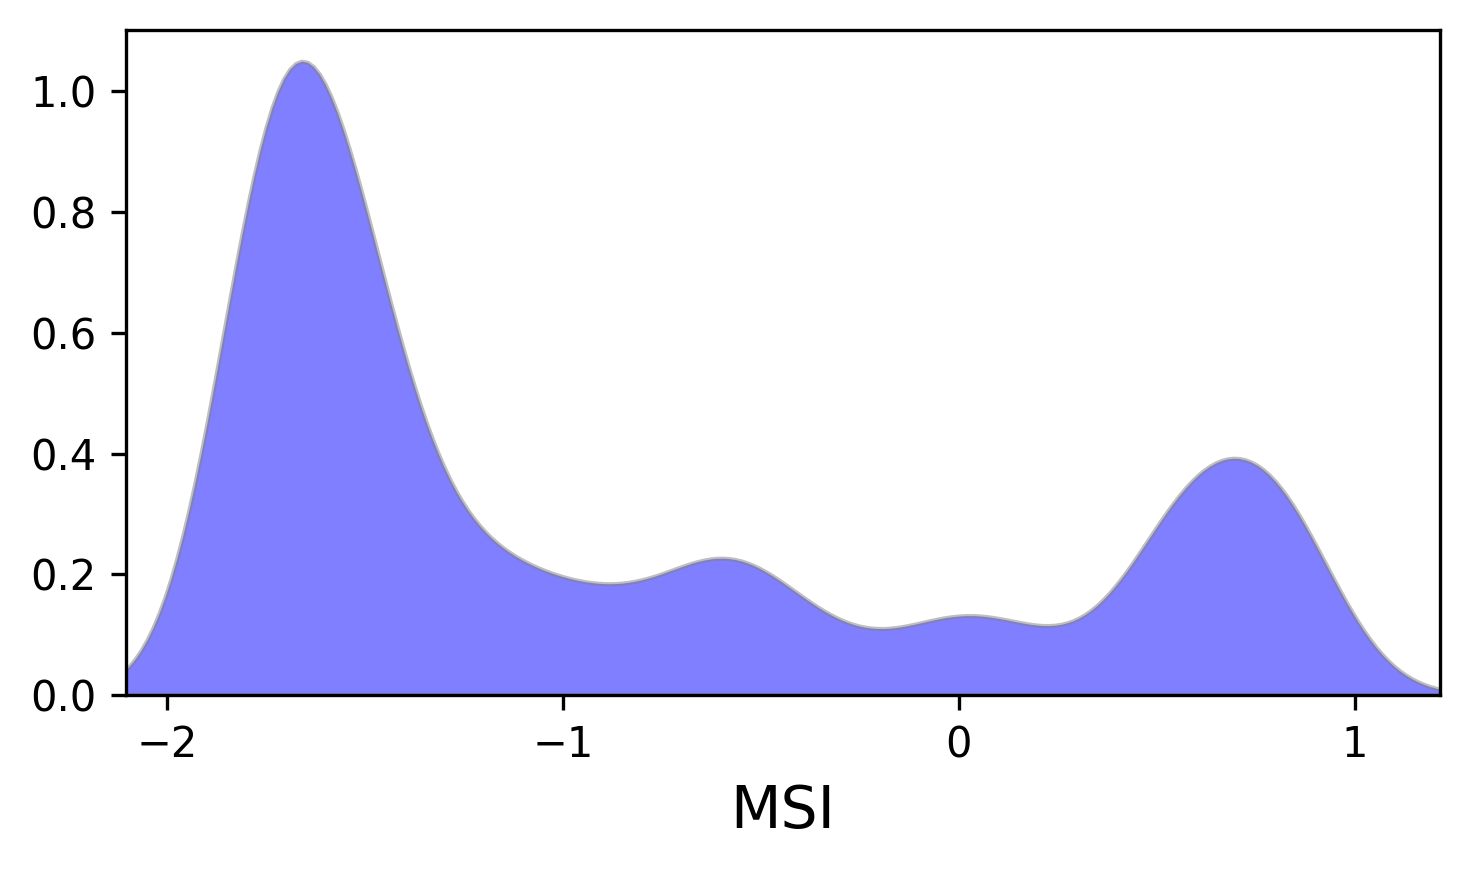

In [13]:
fig, ax = plt.subplots(dpi = 300, figsize=(5,3))

# Kernel estimation
kde.fit(np.array(msi_com).reshape(-1,1))
x_hist = np.arange(-2.5, 2.51, 0.015)
score_users_hist = np.exp(kde.score_samples(x_hist.reshape(-1,1)))
ax.fill_between(x = x_hist, y1=0, y2=score_users_hist, color = color, alpha = 0.50, edgecolor = 'grey', linewidth = 1)

ax.set_xlim(np.quantile(msi['msi'].to_list(), q = [0.005, 0.995]) + np.array([-0.35, 0.35]))
ax.set_xlabel(r'MSI', size = 14)
ax.set_ylim(bottom = 0)
ax.set_xticks([-2, -1, 0, 1])

fig.tight_layout()

plt.savefig(f'Results/MSI_com{rank}.pdf')
plt.savefig(f'Results/MSI_com{rank}.png')

plt.show()

##### IV

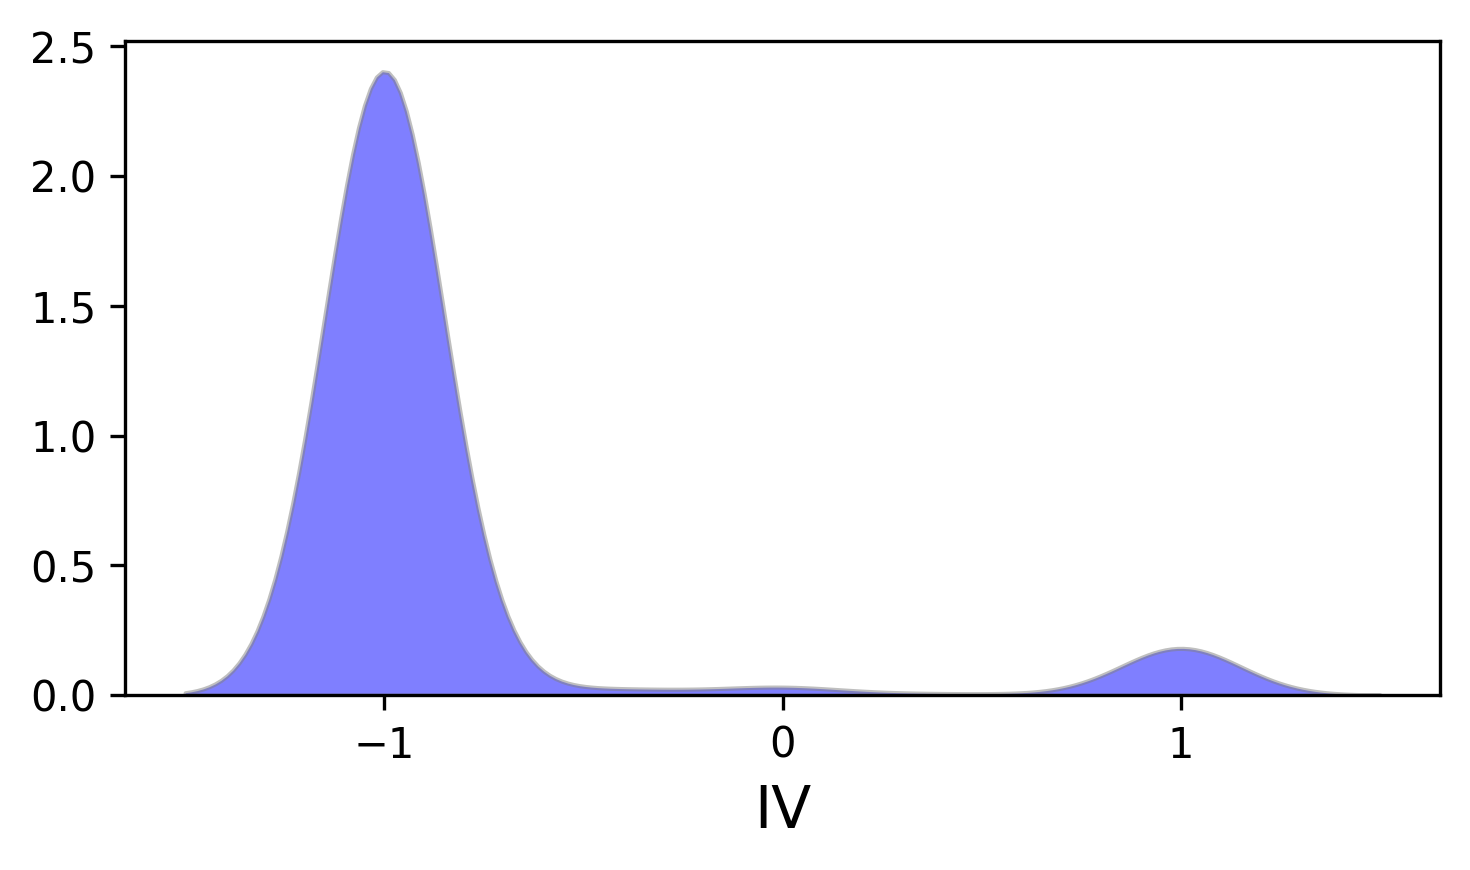

In [14]:
fig, ax = plt.subplots(dpi = 300, figsize=(5,3))

# Kernel estimation
kde.fit(np.array(iv_com).reshape(-1,1))
x_hist = np.arange(-1.5, 1.51, 0.015)
score_users_hist = np.exp(kde.score_samples(x_hist.reshape(-1,1)))
ax.fill_between(x = x_hist, y1=0, y2=score_users_hist, color = color, alpha = 0.50, edgecolor = 'grey', linewidth = 1)

ax.set_xlabel(r'IV', size = 14)
ax.set_ylim(bottom = 0)
ax.set_xticks([-1, 0, 1])

fig.tight_layout()

plt.savefig(f'Results/IV_com{rank}.pdf')
plt.savefig(f'Results/IV_com{rank}.png')

plt.show()